In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The following cell [starting with %] enables you to run as you would from the command line on a terminal. If you are not familiar terminal command lines, just look at the file however you usually do. You should see that the 3rd column has the data as, e.g., 1958.27, which is 27% of the way into 1958, or roughly mid-March, 1958. The 4th column is the measured $CO_2$ abundance in parts per million. Also, note that when you run this cell, \\$CO_2\\$ shows up as $CO_2$, which is TeX. Again, not crucial if you're not interested in learning TeX, but you can see how nice it looks, and that carries over to the labels you will use in the figures below and equations in papers you write. In fact, some people think its typesetting is so good, it's worth using even if you're not writing a science-y paper.

In [34]:
%more ../Data/co2_mm_mlo.txt

Note that the file is in a directory ../Data. If you don't know what that means, probably best to make sure that the file is in the same directory (folder) as this notebook and then the first line below would be 

filename='co2_mm_mlo.txt'

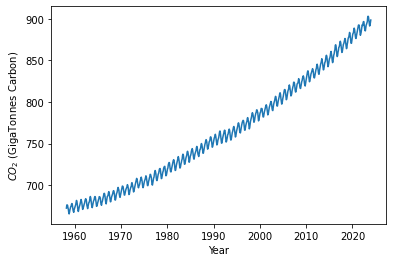

In [35]:
filename='../Data/co2_mm_mlo.txt'
# Asterisks denote comments, not executed
# The two lines below extract the 3rd and 4th columns of the file and put 
# them in the numpy arrays day and co2. [Note that indices start from 0,
# so .T[0] would be the first column, etc.]
day=np.loadtxt(filename).T[2]
co2=np.loadtxt(filename).T[3]
gtc=2.13 # global tons of carbon for 1 ppm
plt.plot(day,co2*gtc)
plt.xlabel('Year')
plt.ylabel('$CO_2$ (GigaTonnes Carbon)')
# saving in a different folder; if you don't want to do this, remove
# the ../Figures/ part. If you do want to do this, make sure the folder
# exists.
plt.savefig('../Figures/co2atm.png')

Suppose we wanted to smooth the data, get rid of the seasonal variation that has nothing to do with $CO_2$ long-term. There are
several ways to do this.

## Smoothing, 1

790
66


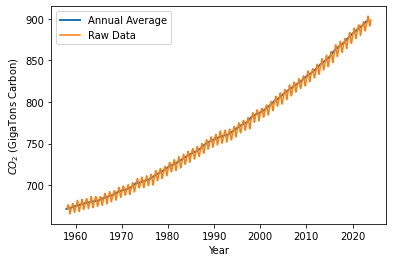

In [42]:
# The brute force way to do this is in a loop:
# For each year average over the 12 values in the year.
# The first full year is 1959 and the last is 2023
n=np.size(day) # the total number of data points
print(n)
yearavg=np.arange(1958,2024) # This sets up an array that contains: [1958, 1959,..., 2023]
nyear=np.size(yearavg) # This is the size of that array
print(nyear)
co2avg=np.zeros(nyear) # This sets up an array of that size with all zeros in it
nperyear=np.zeros(nyear)

for i in range(n): # loop through all data points
    for j,yr in enumerate(yearavg): # loop through all years, with the first one numbered j=0
        if np.floor(day[i]) == yr: # keep only those points in this year, floor takes out the decimal, so leaves all
                                # entries in a given year. E.g., 1958.27 and 1958.67 are both set to 1958
            co2avg[j]=co2avg[j]+co2[i] # note the indexing here: if j=0,
                # that corresponds to 1958, and we are adding in the data point i because
                # we determined that that was in 1958
            nperyear[j]=nperyear[j]+1 # increase the number of data points for this year
plt.plot(yearavg,co2avg*gtc/nperyear,linewidth=2,label='Annual Average')
plt.plot(day,co2*gtc,label='Raw Data')
plt.xlabel('Year')
plt.ylabel('$CO_2$ (GigaTons Carbon)')
plt.legend()
    

# Smoothing, 2

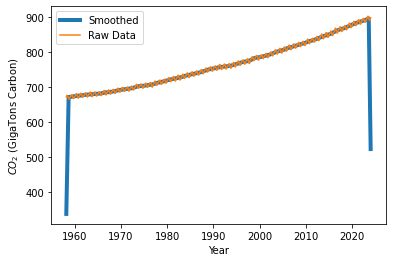

In [45]:
# We can use functions that already exist in numpy to do this much faster
# and more compactly without loops
kernel=np.ones(12)/12 # sets up a kernel equal to 1/12 for 12 values.
co2sm=np.convolve(co2,kernel,"same")
# This outputs \sum_{n=1}^{12} co2[m-n] * kernel[n]
plt.plot(day,co2sm*gtc,linewidth=4,label='Smoothed')
plt.plot(day,co2*gtc,label='Raw Data')
plt.xlabel('Year')
plt.ylabel('$CO_2$ (GigaTons Carbon)')
plt.legend()


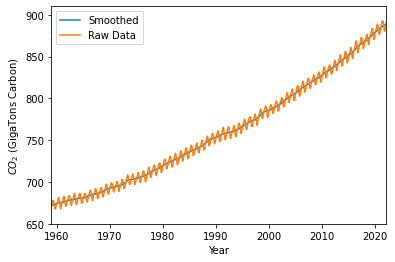

In [46]:
# Note that it causes problems at the boundary.
# Fix this by simply limiting the points shown:
plt.axis([1959,2022,650,910])
plt.plot(day,co2sm*gtc,label='Smoothed')
plt.plot(day,co2*gtc,label='Raw Data')
plt.xlabel('Year')
plt.ylabel('$CO_2$ (GigaTons Carbon)')
plt.legend()
